In [152]:
import pandas as pd

dados = pd.read_csv('Road.csv', sep=',')
dados.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Data Wrangling

In [153]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [154]:
dados.shape[0]

12316

In [155]:
dados['Time'][0]

'17:02:00'

In [156]:
dados_time = pd.DataFrame(dados['Time'].copy())
dados_time = dados_time.astype({'Time':'str'})
dados_time[['hh', 'mm','ss']] = dados_time['Time'].str.split(':', expand=True)
dados_time = dados_time.astype({'hh':'int64'})

In [157]:
dados_time.head()

,Time,hh,mm,ss
0,17:02:00,17,02,00
1,17:02:00,17,02,00
2,17:02:00,17,02,00
3,1:06:00,1,06,00
4,1:06:00,1,06,00


In [158]:
dados_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    12316 non-null  object
 1   hh      12316 non-null  int64 
 2   mm      12316 non-null  object
 3   ss      12316 non-null  object
dtypes: int64(1), object(3)
memory usage: 385.0+ KB


In [159]:
dados_time.loc[dados_time['hh'] < 6, 'horario'] = 'Madrugada'
dados_time.loc[(dados_time['hh'] >= 6) & (dados_time['hh'] < 12), 'horario'] = 'Manhã'
dados_time.loc[(dados_time['hh'] >= 12) & (dados_time['hh'] < 18), 'horario'] = 'Tarde'
dados_time.loc[dados_time['hh'] >= 18, 'horario'] = 'Noite'

In [160]:
dados_time['horario'].describe()

count     12316
unique        4
top       Tarde
freq       5125
Name: horario, dtype: object

In [161]:
def plot(dataset,coluna):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,10))
    sns.histplot(data=dataset[coluna], kde=True, bins=30, color = 'darkorange')
    plt.xlabel(coluna, fontsize=16)
    plt.ylabel('Frequência', fontsize=16)
    plt.show()

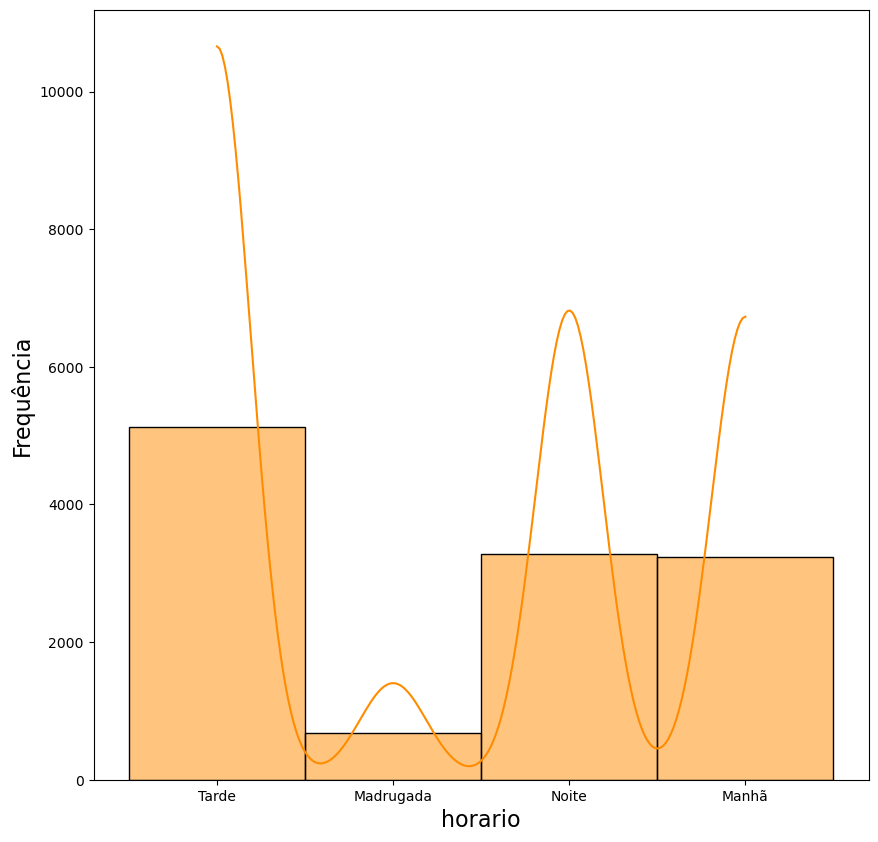

In [162]:
plot(dados_time,'horario')

In [163]:
d = pd.DataFrame(dados_time['horario'])
d.head()

,horario
0,Tarde
1,Tarde
2,Tarde
3,Madrugada
4,Madrugada


In [164]:
dados = pd.concat([dados,d], axis=1)
dados.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,horario
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,Tarde
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Tarde
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,Tarde
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Madrugada
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Madrugada


In [165]:
dados.drop(columns=['Time'], inplace=True)
dados.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,horario
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,Tarde
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Tarde
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,Tarde
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Madrugada
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Madrugada


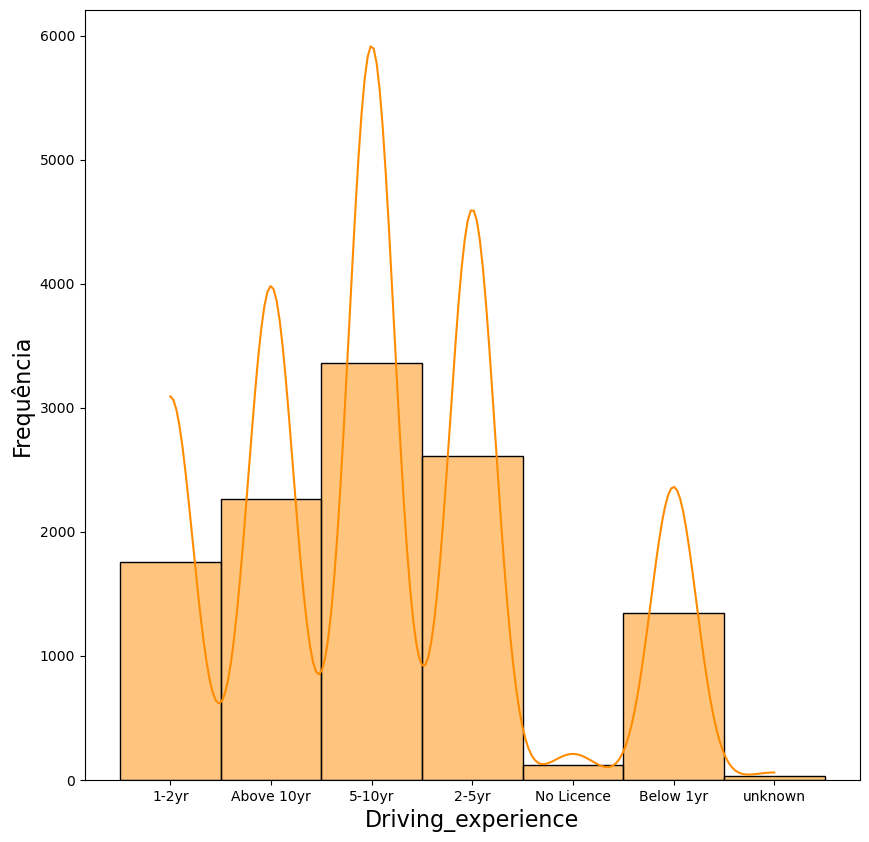

In [166]:
plot(dados,'Driving_experience')

In [167]:
coluna = dados.columns
for col in coluna:
    dados.loc[(dados[col].isna()) | (dados[col] == 'na') | (dados[col] == 'Unknown') | (dados[col] == 'unknown'), col] = dados['Educational_level'].value_counts().idxmax()

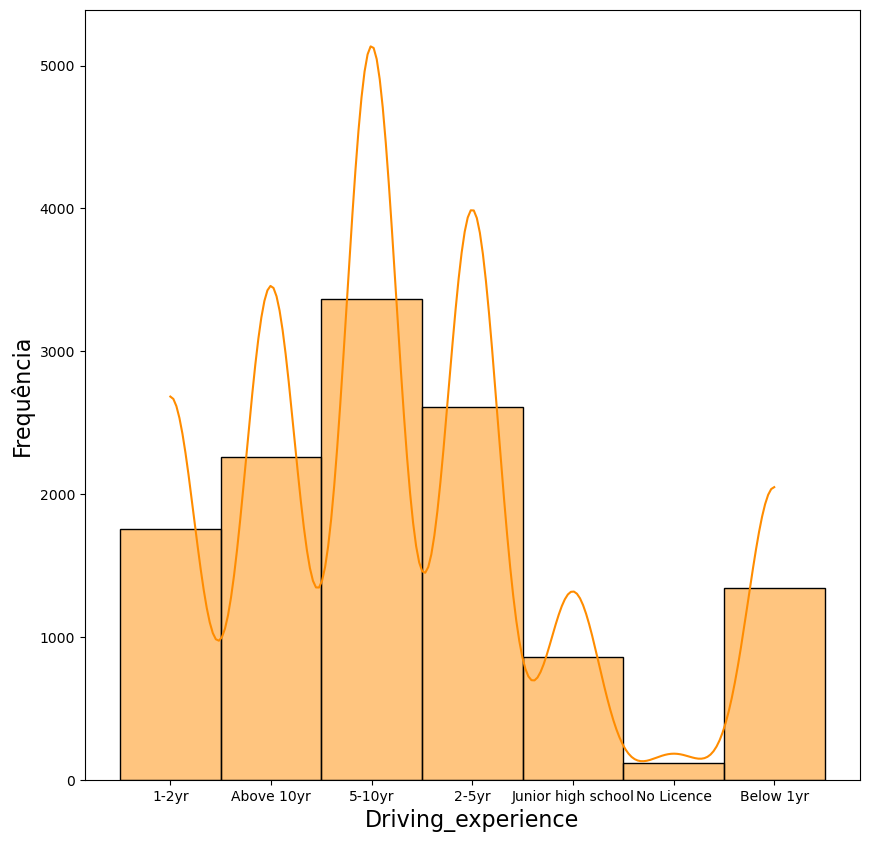

In [168]:
plot(dados,'Driving_experience')

In [169]:
for col in dados.columns:
    print(f"Coluna: {col}")
    print(dados[col].unique())
    print("-"*30)

Coluna: Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------
Coluna: Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Junior high school']
------------------------------
Coluna: Sex_of_driver
['Male' 'Female' 'Junior high school']
------------------------------
Coluna: Educational_level
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
------------------------------
Coluna: Vehicle_driver_relation
['Employee' 'Junior high school' 'Owner' 'Other']
------------------------------
Coluna: Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Junior high school' 'No Licence'
 'Below 1yr']
------------------------------
Coluna: Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' 'Junior high school'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'B

In [170]:
dados.columns = dados.columns.str.replace(' ', '')
dados.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,horario
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Moving Backward,Slight Injury,Tarde
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Overtaking,Slight Injury,Tarde
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Junior high school,No defect,...,Driver or rider,Male,31-50,3,Driver,Junior high school,Not a Pedestrian,Changing lane to the left,Serious Injury,Tarde
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Junior high school,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Madrugada
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Junior high school,Owner,5-10yrs,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Overtaking,Slight Injury,Madrugada


In [171]:
dados.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'horario'],
      dtype='object')

## Descritiva

In [172]:
import pandas_profiling 

pandas_profiling.ProfileReport(dados)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Wrangling Pt. 2

In [173]:
dados.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,horario
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Moving Backward,Slight Injury,Tarde
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Overtaking,Slight Injury,Tarde
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Junior high school,No defect,...,Driver or rider,Male,31-50,3,Driver,Junior high school,Not a Pedestrian,Changing lane to the left,Serious Injury,Tarde
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Junior high school,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Madrugada
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Junior high school,Owner,5-10yrs,No defect,...,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Junior high school,Not a Pedestrian,Overtaking,Slight Injury,Madrugada


In [174]:
colunas = dados.drop(columns=['Accident_severity','Number_of_vehicles_involved','Number_of_casualties']).columns

dados = pd.get_dummies(data= dados, columns=colunas, drop_first = True)
dados.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,horario_Manhã,horario_Noite,horario_Tarde
0,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,Slight Injury,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,2,2,Serious Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,2,Slight Injury,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [175]:
#Tabela de frequências absolutas da variável 'atrasado' com labels
dados = dados.copy()

dados['Accident_severity'].value_counts(sort=False)

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [178]:
#Criando uma variável 'disturbio do sono' a partir da variável 'Accident_severity',
#com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit'
dados.loc[dados['Accident_severity']==
                            'Slight Injury',
                            'tipo_acidente'] = 0 #categoria de referência
dados.loc[dados['Accident_severity']==
                            'Serious Injury',
                            'tipo_acidente'] = 1
dados.loc[dados['Accident_severity']==
                            'Fatal injury',
                            'tipo_acidente'] = 2

dados['tipo_acidente'] =\
    dados['tipo_acidente'].astype('int64')

C:\Users\bruno\AppData\Local\Temp\ipykernel_3872\1036782002.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados.loc[dados['Accident_severity']==


In [179]:
dados.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,horario_Manhã,horario_Noite,horario_Tarde,tipo_acidente
0,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2,Slight Injury,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,2,2,Serious Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2,2,Slight Injury,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
dados = dados.astype({'Number_of_vehicles_involved':'int64', 'Number_of_casualties':'int64'})

## Árvore de Decisão 

In [180]:
x = dados.drop(columns=['Accident_severity', 'tipo_acidente'])
y = dados['tipo_acidente']

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [182]:
arvore_inadimplencia = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
arvore_inadimplencia.fit(x_treinamento,y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [183]:
previsoes_arvore = arvore_inadimplencia.predict(x_teste)
previsoes_arvore

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
from sklearn.metrics import accuracy_score, classification_report

In [186]:
accuracy_score(y_teste,previsoes_arvore)

0.7765151515151515

c:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7765151515151515

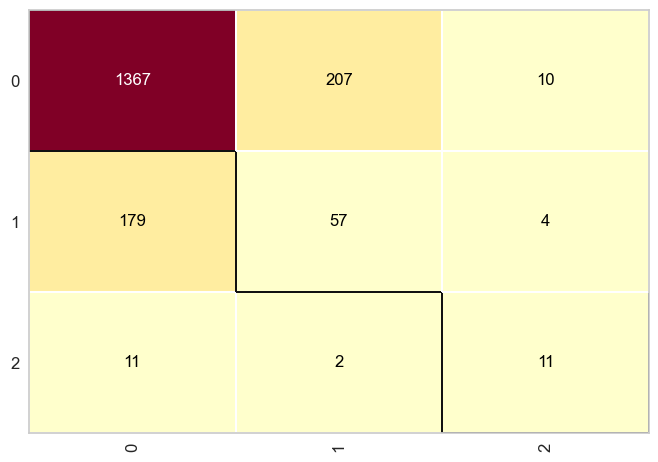

In [187]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_inadimplencia)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [188]:
print(classification_report(y_teste,previsoes_arvore))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1584
           1       0.21      0.24      0.23       240
           2       0.44      0.46      0.45        24

    accuracy                           0.78      1848
   macro avg       0.51      0.52      0.51      1848
weighted avg       0.79      0.78      0.78      1848



## Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators= 150, criterion= 'entropy', random_state= 0)
random_forest.fit(x_treinamento,y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [191]:
previsoes_random_forest = random_forest.predict(x_teste)
previsoes_random_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste,previsoes_random_forest)

0.8571428571428571

c:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8571428571428571

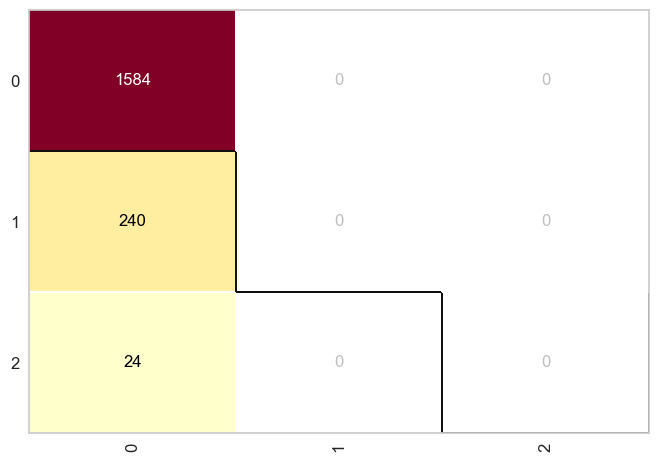

In [193]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [194]:
print(classification_report(y_teste,previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1584
           1       0.00      0.00      0.00       240
           2       0.00      0.00      0.00        24

    accuracy                           0.86      1848
   macro avg       0.29      0.33      0.31      1848
weighted avg       0.73      0.86      0.79      1848



c:\Users\bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Redes Neurais

In [195]:
from sklearn.neural_network import MLPClassifier
rede_neural_credit = MLPClassifier(max_iter= 1000, verbose= True, 
                                   solver = 'adam', activation= 'relu',
                                   hidden_layer_sizes= (150,150))
rede_neural_credit.fit(x_treinamento,y_treinamento)

Iteration 1, loss = 0.52007774
Iteration 2, loss = 0.46678042
Iteration 3, loss = 0.45659081
Iteration 4, loss = 0.44705158
Iteration 5, loss = 0.43459314
Iteration 6, loss = 0.41888621
Iteration 7, loss = 0.39641837
Iteration 8, loss = 0.37441071
Iteration 9, loss = 0.34007399
Iteration 10, loss = 0.30676701
Iteration 11, loss = 0.27256828
Iteration 12, loss = 0.24778929
Iteration 13, loss = 0.21606666
Iteration 14, loss = 0.18866499
Iteration 15, loss = 0.16373942
Iteration 16, loss = 0.14080108
Iteration 17, loss = 0.11787955
Iteration 18, loss = 0.10053091
Iteration 19, loss = 0.08733803
Iteration 20, loss = 0.07139918
Iteration 21, loss = 0.05774801
Iteration 22, loss = 0.04503571
Iteration 23, loss = 0.03889139
Iteration 24, loss = 0.02942609
Iteration 25, loss = 0.02286724
Iteration 26, loss = 0.01877644
Iteration 27, loss = 0.01566155
Iteration 28, loss = 0.01418671
Iteration 29, loss = 0.01049550
Iteration 30, loss = 0.00809010
Iteration 31, loss = 0.00652482
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(150, 150), max_iter=1000, verbose=True)

In [196]:
previsoes_rede_neural = rede_neural_credit.predict(x_teste)
previsoes_rede_neural

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste,previsoes_rede_neural)

0.7949134199134199

c:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.7949134199134199

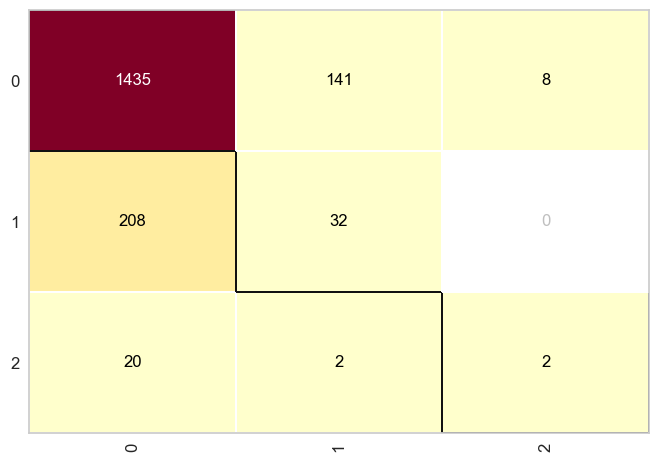

In [198]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [199]:
print(classification_report(y_teste,previsoes_rede_neural))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1584
           1       0.18      0.13      0.15       240
           2       0.20      0.08      0.12        24

    accuracy                           0.79      1848
   macro avg       0.42      0.37      0.39      1848
weighted avg       0.77      0.79      0.78      1848

